In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("50_startups.csv")
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
df.drop('State',axis=1,inplace=True)
df.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.rename(columns={'R&D Spend':'rds','Administration':'admin','Marketing Spend':'mks'},inplace=True)

In [8]:
df.head(2)

,rds,admin,mks,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [9]:
df.corr()

,rds,admin,mks,Profit
rds,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mks,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


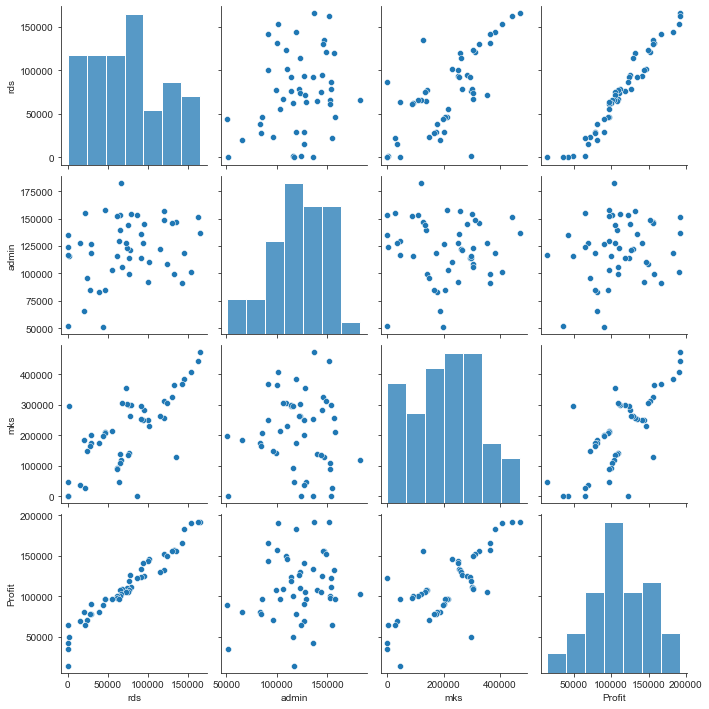

In [10]:
sns.set_style(style='ticks')
sns.pairplot(df)

In [11]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~rds+admin+mks',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        13:10:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mks            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
rsq1 = smf.ols('rds~admin+mks',data=df).fit().rsquared
vif1=1/(1-rsq1)
rsq2 = smf.ols('mks~rds+admin',data=df).fit().rsquared
vif2=1/(1-rsq2)
rsq3 = smf.ols('admin~mks+rds',data=df).fit().rsquared
vif3=1/(1-rsq3)
df1={'Variables':['Rn','Mkt','Admin'],'VIF':[vif1,vif2,vif3]}
vif=pd.DataFrame(df1)
vif


,Variables,VIF
0,Rn,2.468903
1,Mkt,2.326773
2,Admin,1.175091


In [14]:
# all VIF's vslues are less than 10 so, no Collinearity chances

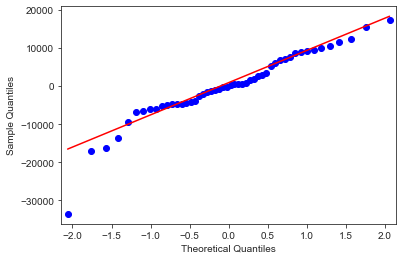

In [16]:
import statsmodels.api as sm
qq = sm.qqplot(model.resid,line='q')
plt.show()

In [17]:
np.where(model.resid<-22000)

(array([49], dtype=int64),)

In [18]:
def get_standardized_values(value):
    return (value-value.mean())/value.std()

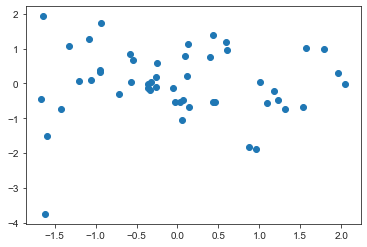

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.show()

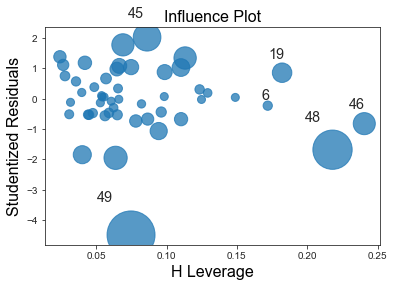

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
df[df.index.isin([49])]

,rds,admin,mks,Profit
49,0.0,116983.8,45173.06,14681.4


In [26]:
df1=df.drop(df.index[[49]],axis=0).reset_index()
df1=df1.drop(['index'],axis=1)
df1.tail()

,rds,admin,mks,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


In [27]:
model2=smf.ols('Profit~rds+admin+mks',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.85e-32
Time:                        13:39:09   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rds            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
mks            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#transformation

In [30]:
model3=smf.ols('Profit~rds+np.square(admin)*admin+np.square(mks)*mks',data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     190.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.08e-29
Time:                        13:40:49   Log-Likelihood:                -504.12
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      42   BIC:                             1035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.855e-05   5.97e-06      6.457      0.000    2.65e-05    5.06e-05
rds                        0.7759      0.039     19.779      0.000       0.697       0.855
np.square(admin)       -1.073e-05   2.97e-06     -3.613      0.001   -1.67e-05   -4.74e-06
admin                      1.3331      0.206      6.473      0.000       0.918       1.749
np.square(admin):admin  2.644e-11   1.13e-11      2.347      0.024    3.71e-12    4.92e-11
np.square(mks)         -3.932e-07   3.53e-07     -1.114      0.272   -1.11e-06    3.19e-07
mks                        0.0807      0.067      1.202      0.236      -0.055       0.216
np.square(mks):mks      6.417e-13    5.2e-13      1.233      0.224   -4.08e-13    1.69e-12
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.500
Skew:                           0.170   Prob(JB):                        0.472
Kurtosis:                       2.213   Cond. No.                     9.64e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

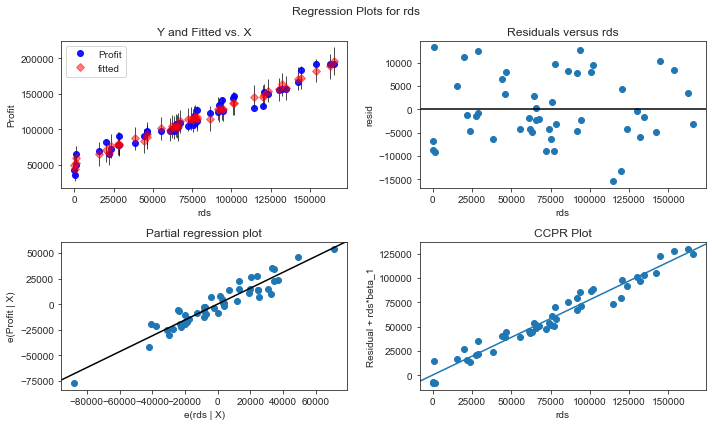

In [31]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model3,"rds",fig=fig)
plt.show()

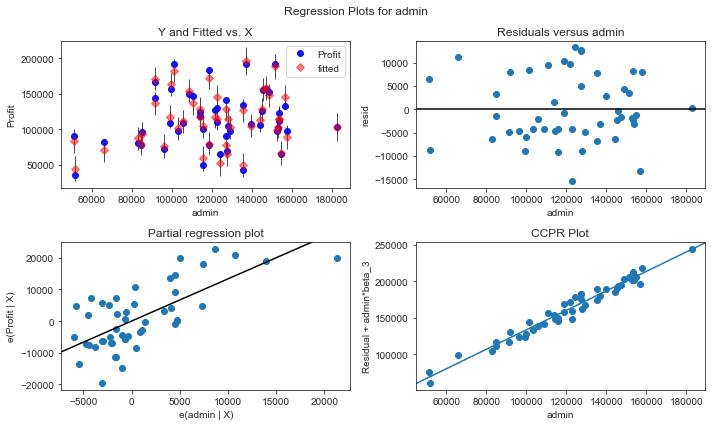

In [34]:
fig= plt.figure(figsize=(10,6))
fig= sm.graphics.plot_regress_exog(model3,"admin",fig=fig)
plt.show()

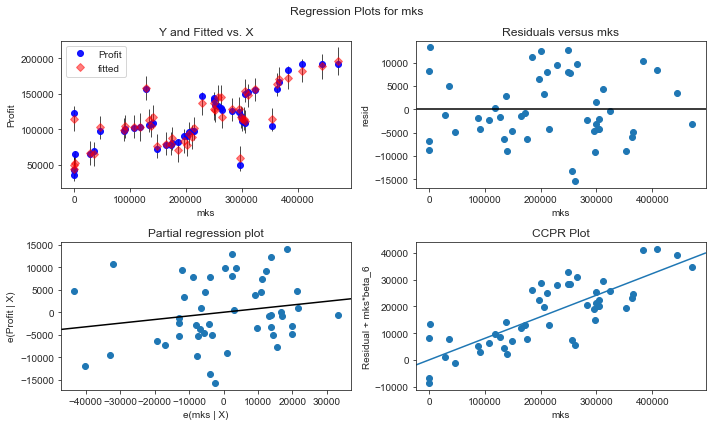

In [35]:
fig=plt.figure(figsize=(10,6))
fig= sm.graphics.plot_regress_exog(model3,"mks",fig=fig)
plt.show()

In [36]:
model3.predict(df1.iloc[0:3,])

0    195493.412075
1    188288.204191
2    182542.085960
dtype: float64